In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import api keys, city py module and requests library
from config import weather_api_key
import requests
from citipy import citipy

# Get url for open weather maps API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salalah
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | kahului
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | aksu
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | bam
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | los llanos de aridane
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | kem
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | isiro
Processing Record 23 of Set 1 | taolanaro


Processing Record 35 of Set 4 | fare
Processing Record 36 of Set 4 | ust-nera
Processing Record 37 of Set 4 | el badari
City not found. Skipping...
Processing Record 38 of Set 4 | savannah bight
Processing Record 39 of Set 4 | bredasdorp
Processing Record 40 of Set 4 | punta arenas
Processing Record 41 of Set 4 | samusu
City not found. Skipping...
Processing Record 42 of Set 4 | lolua
City not found. Skipping...
Processing Record 43 of Set 4 | fairbanks
Processing Record 44 of Set 4 | brae
Processing Record 45 of Set 4 | kavaratti
Processing Record 46 of Set 4 | rio grande
Processing Record 47 of Set 4 | westport
Processing Record 48 of Set 4 | tonantins
Processing Record 49 of Set 4 | prince rupert
Processing Record 50 of Set 4 | boguchany
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | valparaiso
Processing Record 3 of Set 5 | nikolskoye
Processing Record 4 of Set 5 | lavrentiya
Processing Record 5 of Set 5 | paamiut
Processing Record 6 of Set 5 | la asuncion
Pr

Processing Record 23 of Set 8 | pareora
Processing Record 24 of Set 8 | iracoubo
Processing Record 25 of Set 8 | bac giang
Processing Record 26 of Set 8 | praya
Processing Record 27 of Set 8 | seydi
Processing Record 28 of Set 8 | visnes
Processing Record 29 of Set 8 | narsaq
Processing Record 30 of Set 8 | moron
Processing Record 31 of Set 8 | chalus
Processing Record 32 of Set 8 | terme
Processing Record 33 of Set 8 | mogadishu
Processing Record 34 of Set 8 | balangir
Processing Record 35 of Set 8 | ketchikan
Processing Record 36 of Set 8 | black river
Processing Record 37 of Set 8 | baruun-urt
Processing Record 38 of Set 8 | pasighat
Processing Record 39 of Set 8 | lyngseidet
Processing Record 40 of Set 8 | rivadavia
Processing Record 41 of Set 8 | natal
Processing Record 42 of Set 8 | chatra
Processing Record 43 of Set 8 | mudgee
Processing Record 44 of Set 8 | san vicente
Processing Record 45 of Set 8 | ganzhou
Processing Record 46 of Set 8 | dicabisagan
Processing Record 47 of Se

Processing Record 13 of Set 12 | sierra vista
Processing Record 14 of Set 12 | tiksi
Processing Record 15 of Set 12 | zyryanka
Processing Record 16 of Set 12 | rawlins
Processing Record 17 of Set 12 | majene
Processing Record 18 of Set 12 | bolshaya glushitsa
Processing Record 19 of Set 12 | zilupe
Processing Record 20 of Set 12 | aksarka
Processing Record 21 of Set 12 | wanaka
Processing Record 22 of Set 12 | saiha
Processing Record 23 of Set 12 | mizdah
Processing Record 24 of Set 12 | parkes
Processing Record 25 of Set 12 | lyubinskiy
Processing Record 26 of Set 12 | camacha
Processing Record 27 of Set 12 | peniche
Processing Record 28 of Set 12 | lagoa
Processing Record 29 of Set 12 | tongren
Processing Record 30 of Set 12 | mitsamiouli
Processing Record 31 of Set 12 | anadyr
Processing Record 32 of Set 12 | soyo
Processing Record 33 of Set 12 | yura
Processing Record 34 of Set 12 | saint-pierre
Processing Record 35 of Set 12 | da nang
Processing Record 36 of Set 12 | butterworth
P

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salalah,17.0151,54.0924,77.86,94,100,6.85,OM,2022-07-16 15:28:23
1,Busselton,-33.6500,115.3333,56.93,75,81,5.48,AU,2022-07-16 15:28:23
2,Kahului,20.8947,-156.4700,77.85,80,0,18.41,US,2022-07-16 15:28:23
3,Geraldton,-28.7667,114.6000,54.01,87,100,3.44,AU,2022-07-16 15:28:24
4,Aksu,41.1231,80.2644,84.22,26,0,6.11,CN,2022-07-16 15:28:24
5,Ilulissat,69.2167,-51.1000,42.82,81,75,4.61,GL,2022-07-16 15:28:24
6,Pisco,-13.7000,-76.2167,64.45,68,100,5.75,PE,2022-07-16 15:28:25
7,Clyde River,70.4692,-68.5914,50.23,57,75,19.57,CA,2022-07-16 15:26:30
8,Cidreira,-30.1811,-50.2056,64.96,95,100,1.88,BR,2022-07-16 15:28:25
9,Saint-Philippe,-21.3585,55.7679,69.39,75,72,12.12,RE,2022-07-16 15:28:25


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Salalah,OM,2022-07-16 15:28:23,17.0151,54.0924,77.86,94,100,6.85
1,Busselton,AU,2022-07-16 15:28:23,-33.6500,115.3333,56.93,75,81,5.48
2,Kahului,US,2022-07-16 15:28:23,20.8947,-156.4700,77.85,80,0,18.41
3,Geraldton,AU,2022-07-16 15:28:24,-28.7667,114.6000,54.01,87,100,3.44
4,Aksu,CN,2022-07-16 15:28:24,41.1231,80.2644,84.22,26,0,6.11
5,Ilulissat,GL,2022-07-16 15:28:24,69.2167,-51.1000,42.82,81,75,4.61
6,Pisco,PE,2022-07-16 15:28:25,-13.7000,-76.2167,64.45,68,100,5.75
7,Clyde River,CA,2022-07-16 15:26:30,70.4692,-68.5914,50.23,57,75,19.57
8,Cidreira,BR,2022-07-16 15:28:25,-30.1811,-50.2056,64.96,95,100,1.88
9,Saint-Philippe,RE,2022-07-16 15:28:25,-21.3585,55.7679,69.39,75,72,12.12


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [4]:
city_data_df = pd.read_csv("weather_data/cities.csv")

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Salalah,OM,2022-07-16 15:28:23,17.0151,54.0924,77.86,94,100,6.85
1,1,Busselton,AU,2022-07-16 15:28:23,-33.6500,115.3333,56.93,75,81,5.48
2,2,Kahului,US,2022-07-16 15:28:23,20.8947,-156.4700,77.85,80,0,18.41
3,3,Geraldton,AU,2022-07-16 15:28:24,-28.7667,114.6000,54.01,87,100,3.44
4,4,Aksu,CN,2022-07-16 15:28:24,41.1231,80.2644,84.22,26,0,6.11


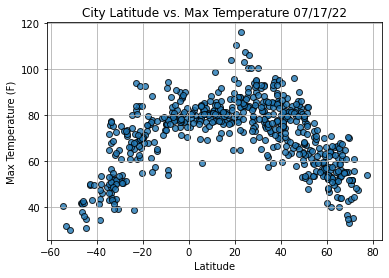

In [5]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

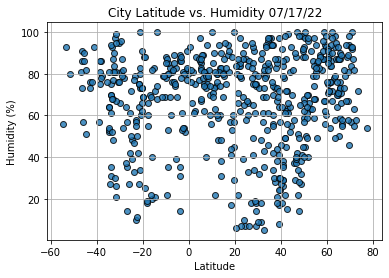

In [6]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

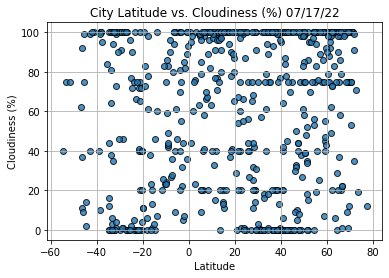

In [7]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

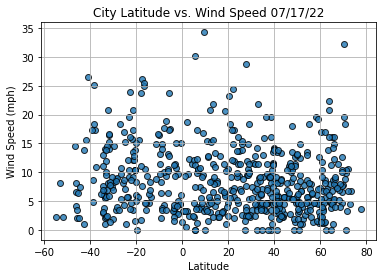

In [8]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [9]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [10]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

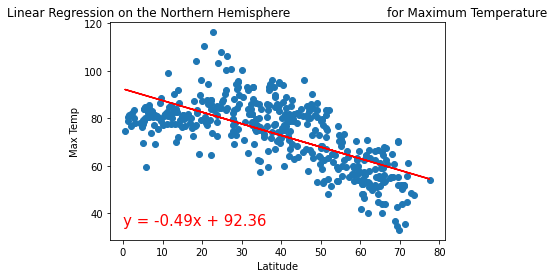

In [12]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,35))

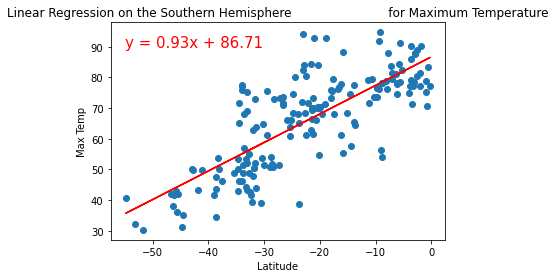

In [14]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))

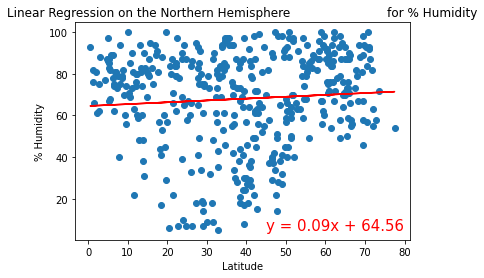

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,5))

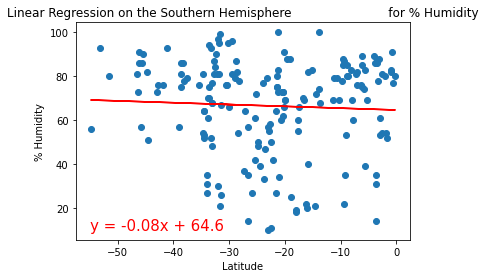

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,10))

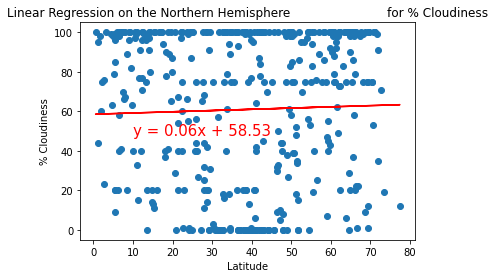

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,48))

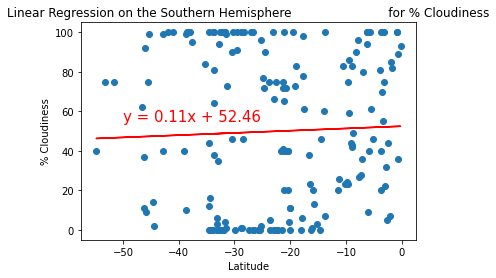

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,55))

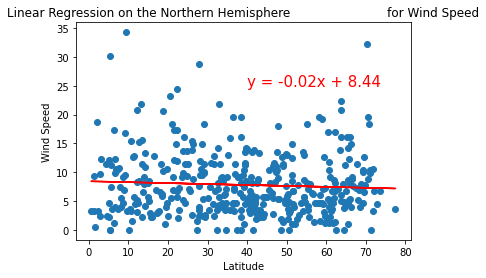

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

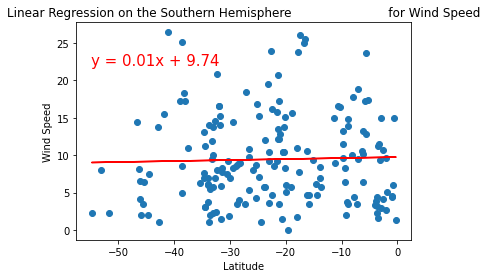

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,22))